In [116]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
warnings.filterwarnings('ignore')

In [54]:
df=pd.read_excel('E:/job/exampl_2.xlsx')
df.head(3)

,actual,Banks model,Beelines model
0,0,0.1992,0.149209
1,0,0.0003,0.629855
2,0,0.1494,0.100507


In [55]:
y0=df[['actual']]
y1=df[['Banks model']]
y2=df[['Beelines model']]

In [56]:
percentages = np.arange(start=1, stop=len(y0) + 1)/float(len(y0))

In [280]:
#Banks model
y1_1=np.cumsum(df.sort_values(by='Banks model', ascending=False, inplace=False)['actual'],axis=0)
#Banks model
y2_1=np.cumsum(df.sort_values(by='Beelines model', ascending=False, inplace=False)['actual'],axis=0)
#ideal model
y3_1=np.cumsum(df.sort_values(by='actual', ascending=False, inplace=False)['actual'],axis=0)
#baseline
y4_1=np.arange(start=1, stop=len(y0) + 1)*float(y0.sum()/len(y0))

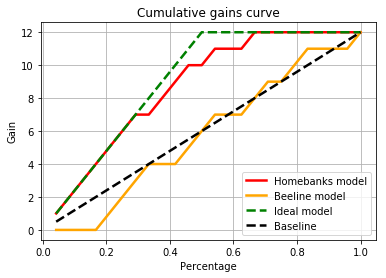

In [281]:
plt.plot(percentages,y1_1,'-',lw=2.5, color='red',label='Homebanks model')
plt.plot(percentages,y2_1,'-',lw=2.5, color='orange',label='Beeline model')
plt.plot(percentages,y3_1,'--',lw=2.5,color='green', label='Ideal model')
plt.plot(percentages,y4_1,'--', lw=2.5,color='black',label='Baseline')
plt.grid(True)
plt.title('Cumulative gains curve')
plt.xlabel('Percentage')
plt.ylabel('Gain')
plt.legend(loc='best')
plt.show()


In [63]:
y1_2=y1_1/y4_1
y2_2=y2_1/y4_1
y3_2=y3_1/y4_1
y4_2=y4_1/y4_1

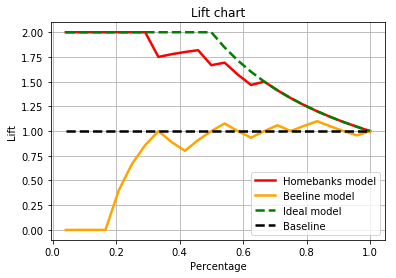

In [273]:
plt.plot(percentages,y1_2,'-',lw=2.5, color='red',label='Homebanks model')
plt.plot(percentages,y2_2,'-',lw=2.5, color='orange',label='Beeline model')
plt.plot(percentages,y3_2,'--',lw=2.5,color='green', label='Ideal model')
plt.plot(percentages,y4_2,'--', lw=2.5,color='black',label='Baseline')
plt.grid(True)
plt.title('Lift chart')
plt.xlabel('Percentage')
plt.ylabel('Lift')
plt.legend(loc='best')
plt.show()

In [252]:
from sklearn.metrics import roc_auc_score
a=roc_auc_score(y0, y1)
b=roc_auc_score(y0, y2)

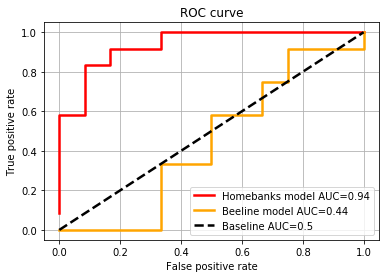

In [272]:
fpr1, tpr1, _ = roc_curve(y0, y1)
fpr2, tpr2, _ = roc_curve(y0, y2)
plt.plot(fpr1,tpr1,'-',lw=2.5, color='red',label='Homebanks model'+' AUC='+str(round(a,2)))
plt.plot(fpr2,tpr2,'-',lw=2.5, color='orange',label='Beeline model'+' AUC='+str(round(b,2)))
plt.plot([0, 1],[0, 1],'--', lw=2.5,color='black',label='Baseline'+' AUC='+str(0.5))
plt.grid(True)
plt.title('ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')
plt.show()

In [75]:
df.corr()

,actual,Banks model,Beelines model
actual,1.000000,0.755936,-0.053697
Banks model,0.755936,1.000000,0.072562
Beelines model,-0.053697,0.072562,1.000000


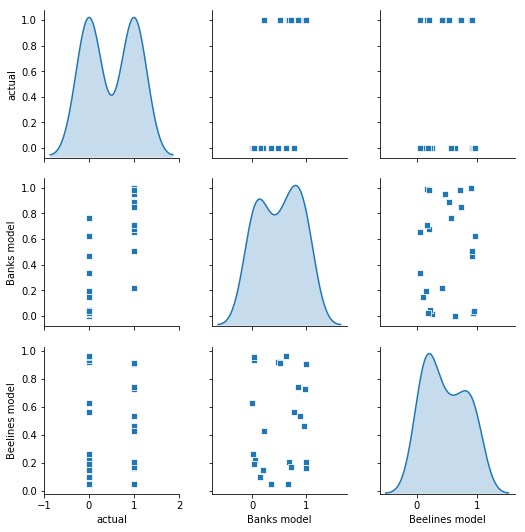

In [117]:
import seaborn as sns
g = sns.pairplot(df, markers=["s"],diag_kind="kde",palette="husl")

In [ ]:
## convert just columns "a" and "b"
#df[["a", "b"]] = df[["a", "b"]].apply(pd.to_numeric)

In [295]:
s = pd.Series(["8", 6, "7.5", 3, "0.9",6,'pandas']) 
s

0         8
1         6
2       7.5
3         3
4       0.9
5         6
6    pandas
dtype: object

In [297]:
pd.to_numeric(s, errors='coerce')

0    8.0
1    6.0
2    7.5
3    3.0
4    0.9
5    6.0
6    NaN
dtype: float64

In [342]:
df1=pd.read_excel('E:/job/1.xlsx')
df1


,a,s,d1,f1,g1
0,3.0,6.0,6,5,2
1,5.0,7.0,2,1,5
2,6.0,2.0,6,5,4
3,7.0,5.0,6,5,2
4,1.0,4.0,2,1,5
5,NaN,NaN,6,5,4


In [343]:
df2=pd.read_excel('E:/job/2.xlsx')
df2

,a,s,d2,f2,g2
0,1,4,4,2,6
1,2,1,6,2,6
2,3,6,6,2,1
3,4,3,3,5,4
4,5,7,3,6,4
5,6,2,5,1,5
6,7,5,5,2,5


In [344]:
pd.merge(df1,df2[['a','s','f2']],on=['a','s'], how='left')

,a,s,d1,f1,g1,f2
0,3.0,6.0,6,5,2,2.0
1,5.0,7.0,2,1,5,6.0
2,6.0,2.0,6,5,4,1.0
3,7.0,5.0,6,5,2,2.0
4,1.0,4.0,2,1,5,2.0
5,NaN,NaN,6,5,4,NaN


In [341]:
pd.merge(df1[['a','s','d1']],df2[['a','s','f2']],on=['a','s'], how='left')

,a,s,d1,f2
0,3.0,6.0,6,2.0
1,5.0,7.0,2,6.0
2,6.0,2.0,6,1.0
3,7.0,5.0,6,2.0
4,1.0,4.0,2,2.0
5,NaN,NaN,6,NaN


In [354]:
pd.concat([df1[['a','s']],df2[['a','s']]])

,a,s
0,3.0,6.0
1,5.0,7.0
2,6.0,2.0
3,7.0,5.0
4,1.0,4.0
5,NaN,NaN
0,1.0,4.0
1,2.0,1.0
2,3.0,6.0
3,4.0,3.0
